# Test Case 8 - Two Inductances

In [1]:
from CircuitCalculator.Circuit.solution import TransientSolution
from CircuitCalculator.Circuit.circuit import Circuit
from CircuitCalculator.Circuit import components as cmp
import numpy as np
import matplotlib.pyplot as plt

## Setup Circuit

In [2]:
R1, R2 = 10, 20
L1, L2 = 0.1, 0.2
V0 = 5
circuit = Circuit([
    cmp.dc_voltage_source(id='Vs', V=V0, nodes=('1', '0')),
    cmp.resistor(id='R1', R=R1, nodes=('1', '2')),
    cmp.inductance(id='L1', L=L1, nodes=('2', '3')),
    cmp.resistor(id='R2', R=R2, nodes=('3', '0')),
    cmp.inductance(id='L2', L=L2, nodes=('3', '0')),
    cmp.ground(nodes=('0',))
])

### Setup Solution

In [3]:
def step(t: np.ndarray) -> np.ndarray:
    return np.heaviside(t, 1)

In [4]:
t_max = 0.02
t0 = 0.001
Ts = t_max/1000
t = np.arange(0, t_max, Ts)
V = V0*step(t-t0)

### Calculate Solution

In [5]:
solution = TransientSolution(
    circuit=circuit,
    tin=t,
    input={'Vs': lambda t: V0*np.heaviside(t-t0, 1)},
)

### Calculate Reference Solution

In [6]:
def quad_equation(b, c):
    return (-b+np.sqrt(b**2-4*c))/2, (-b-np.sqrt(b**2-4*c))/2

x1, x2 = quad_equation(R2/L1+R1/L1+R2/L2, R1*R2/L1/L2)

tout = solution.t

t_ref = tout[tout>t0]-t0

phi3_ref = np.zeros(tout.size)
phi3_ref[tout>t0] = V0*R2/L1 * (np.exp(x1*t_ref)-np.exp(x2*t_ref))/(x1-x2)

iL1_ref = np.zeros(tout.size)
iL1_ref[tout>t0] = V0*R2/L1/L2*(x2*np.exp(x1*t_ref)-x1*np.exp(x2*t_ref)-x2+x1)/(x1*x2*(x1-x2)) + V0/L1*(np.exp(x2*t_ref)-np.exp(x1*t_ref))/(x2-x1)

iL2_ref = iL1_ref - phi3_ref/R2

iR1_ref = iL1_ref
iR2_ref = iL1_ref - iL2_ref

phi2_ref = V-iL1_ref*R1
phi1_ref = V

uR1_ref = phi1_ref - phi2_ref
uR2_ref = phi3_ref

uL1_ref = phi2_ref - phi3_ref
uL2_ref = phi3_ref

iS_ref = -iL1_ref

### Plot Solution

(0.0, 0.02)

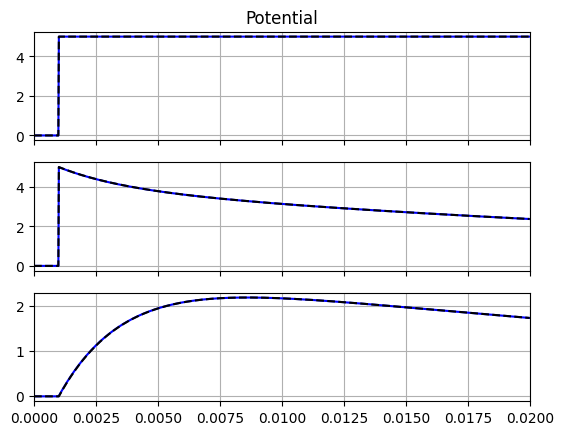

In [7]:
_, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(*solution.get_potential('1'), 'b-')
ax[0].plot(t, phi1_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Potential')

ax[1].plot(*solution.get_potential('2'), 'b-')
ax[1].plot(tout, phi2_ref, 'k--')
ax[1].grid(True)

ax[2].plot(*solution.get_potential('3'), 'b-')
ax[2].plot(tout, phi3_ref, 'k--')
ax[2].grid(True)
ax[2].set_xlim((0, t_max))

(0.0, 0.02)

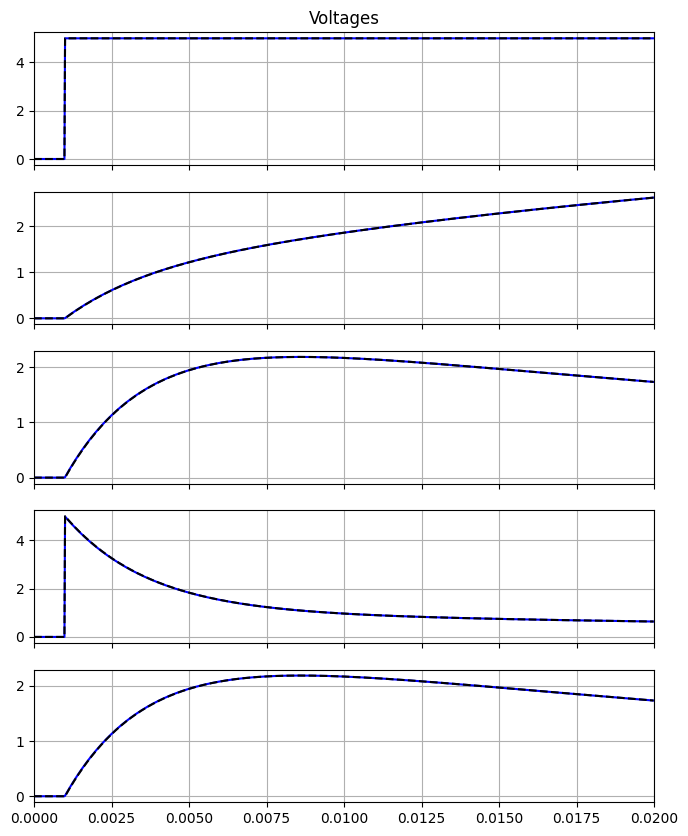

In [8]:
_, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 10))
ax[0].plot(*solution.get_voltage('Vs'), 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Voltages')

ax[1].plot(*solution.get_voltage('R1'), 'b-')
ax[1].plot(tout, uR1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(*solution.get_voltage('R2'), 'b-')
ax[2].plot(tout, uR2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(*solution.get_voltage('L1'), 'b-')
ax[3].plot(tout, uL1_ref, 'k--')
ax[3].grid(True)

ax[4].plot(*solution.get_voltage('L2'), 'b-')
ax[4].plot(tout, uL2_ref, 'k--')
ax[4].grid(True)
ax[4].set_xlim((0, t_max))

(0.0, 0.02)

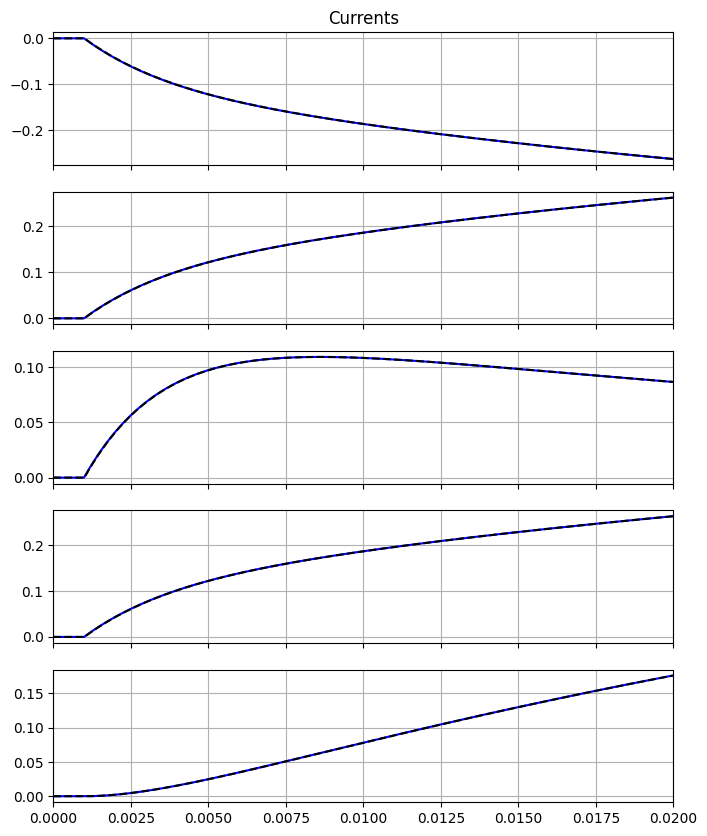

In [9]:
_, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 10))
ax[0].plot(*solution.get_current('Vs'), 'b-')
ax[0].plot(t, iS_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Currents')

ax[1].plot(*solution.get_current('R1'), 'b-')
ax[1].plot(tout, iR1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(*solution.get_current('R2'), 'b-')
ax[2].plot(tout, iR2_ref, 'k--')
ax[2].grid(True)


ax[3].plot(*solution.get_current('L1'), 'b-')
ax[3].plot(tout, iL1_ref, 'k--')
ax[3].grid(True)

ax[4].plot(*solution.get_current('L2'), 'b-')
ax[4].plot(tout, iL2_ref, 'k--')
ax[4].grid(True)
ax[4].set_xlim((0, t_max))